In [1]:
#!/usr/bin/env python3

import os
if(os.getcwd()) != '/home/clayton/science/CANlab/WAViMedEEG/CANlabStudy':
    os.chdir('/home/clayton/science/CANlab/WAViMedEEG/CANlabStudy')

In [2]:
import numpy as np
import pandas as pd

os.chdir('raw')
fnames = os.listdir()

column_names = ['subject', 'group', 'p300', 'flanker', 'chronic', 'rest']

def generateSubjects(fnames):
    return([fname[:3] for fname in fnames])

subs = list(dict.fromkeys(generateSubjects(fnames)))

data = pd.DataFrame(columns=column_names)
data['subject'] = subs
data.set_index('subject', inplace=True)
for sub in subs:
    if (int(sub) in range(100, 199)):
        data.loc[sub]['group']=1
    elif (int(sub) in range(200, 299)):
        data.loc[sub]['group']=2
    else:
        data.loc[sub]['group']=0

ends=[
    '_P300_Eyes_Closed.eeg',
    '_Flanker_Test.eeg',
    '_EO_Baseline_12.eeg',
    '_EO_Baseline_8.eeg']

channel_names = [
    'Fp1',
    'Fp2',
    'F3',
    'F4',
    'F7',
    'F8',
    'C3',
    'C4',
    'P3',
    'P4',
    'O1',
    'O2',
    'T3',
    'T4',
    'T5',
    'T6',
    'FZ',
    'CZ',
    'PZ'
]

data

,group,p300,flanker,chronic,rest
subject,,,,,
112,1,NaN,NaN,NaN,NaN
201,2,NaN,NaN,NaN,NaN
109,1,NaN,NaN,NaN,NaN
103,1,NaN,NaN,NaN,NaN
206,2,NaN,NaN,NaN,NaN
110,1,NaN,NaN,NaN,NaN
104,1,NaN,NaN,NaN,NaN
205,2,NaN,NaN,NaN,NaN
202,2,NaN,NaN,NaN,NaN


In [3]:
def populateTasks(df, fnames):
    for sub in subs:
        if (sub + ends[0]) in fnames:
            df.loc[sub]['p300']=[['eeg','NaN'],['art','NaN'],['evt','NaN']]
        else:
            df.loc[sub]['p300']="none"
        if (sub + ends[1]) in fnames:
            df.loc[sub]['flanker']=[['eeg','NaN'],['art','NaN'],['evt','NaN']]
        else:
            df.loc[sub]['flanker']="none"
        if (sub + ends[2]) in fnames:
            df.loc[sub]['chronic']=[['eeg','NaN'],['art','NaN']]
        else:
            df.loc[sub]['chronic']="none"
        if (sub + ends[3]) in fnames:
            df.loc[sub]['rest']=[['eeg','NaN'],['art','NaN']]
        else:
            df.loc[sub]['rest']="none"
    return(df)
        
multidata = populateTasks(data, fnames)
multidata

,group,p300,flanker,chronic,rest
subject,,,,,
112,1,"[[eeg, NaN], [art, NaN], [evt, NaN]]","[[eeg, NaN], [art, NaN], [evt, NaN]]","[[eeg, NaN], [art, NaN]]","[[eeg, NaN], [art, NaN]]"
201,2,"[[eeg, NaN], [art, NaN], [evt, NaN]]","[[eeg, NaN], [art, NaN], [evt, NaN]]","[[eeg, NaN], [art, NaN]]","[[eeg, NaN], [art, NaN]]"
109,1,"[[eeg, NaN], [art, NaN], [evt, NaN]]","[[eeg, NaN], [art, NaN], [evt, NaN]]","[[eeg, NaN], [art, NaN]]","[[eeg, NaN], [art, NaN]]"
103,1,"[[eeg, NaN], [art, NaN], [evt, NaN]]","[[eeg, NaN], [art, NaN], [evt, NaN]]","[[eeg, NaN], [art, NaN]]","[[eeg, NaN], [art, NaN]]"
206,2,"[[eeg, NaN], [art, NaN], [evt, NaN]]","[[eeg, NaN], [art, NaN], [evt, NaN]]","[[eeg, NaN], [art, NaN]]","[[eeg, NaN], [art, NaN]]"
110,1,"[[eeg, NaN], [art, NaN], [evt, NaN]]","[[eeg, NaN], [art, NaN], [evt, NaN]]",none,"[[eeg, NaN], [art, NaN]]"
104,1,"[[eeg, NaN], [art, NaN], [evt, NaN]]","[[eeg, NaN], [art, NaN], [evt, NaN]]","[[eeg, NaN], [art, NaN]]","[[eeg, NaN], [art, NaN]]"
205,2,"[[eeg, NaN], [art, NaN], [evt, NaN]]","[[eeg, NaN], [art, NaN], [evt, NaN]]",none,"[[eeg, NaN], [art, NaN]]"
202,2,"[[eeg, NaN], [art, NaN], [evt, NaN]]","[[eeg, NaN], [art, NaN], [evt, NaN]]","[[eeg, NaN], [art, NaN]]","[[eeg, NaN], [art, NaN]]"


In [4]:
def loadEEGdata(df):
    for sub in df.index.values:
        for task in df.columns:
            if df.loc[sub][task]!="none":
                if task=="p300":
                    df.loc[sub][task][0][1]=pd.read_csv(sub+ends[0][:-4]+'.eeg', delimiter=' ', names=channel_names, index_col=False)
                    df.loc[sub][task][1][1]=pd.read_csv(sub+ends[0][:-4]+'.art', delimiter=' ', names=channel_names, index_col=False)
                    df.loc[sub][task][2][1]=pd.read_csv(sub+ends[0][:-4]+'.evt', delimiter=' ', names=channel_names, index_col=False)
                if task=="flanker":
                    df.loc[sub][task][0][1]=pd.read_csv(sub+ends[1][:-4]+'.eeg', delimiter=' ', names=channel_names, index_col=False)
                    df.loc[sub][task][1][1]=pd.read_csv(sub+ends[1][:-4]+'.art', delimiter=' ', names=channel_names, index_col=False)
                    df.loc[sub][task][2][1]=pd.read_csv(sub+ends[1][:-4]+'.evt', delimiter=' ', names=channel_names, index_col=False)
                if task=="chronic":
                    df.loc[sub][task][0][1]=pd.read_csv(sub+ends[2][:-4]+'.eeg', delimiter=' ', names=channel_names, index_col=False)
                    df.loc[sub][task][1][1]=pd.read_csv(sub+ends[2][:-4]+'.art', delimiter=' ', names=channel_names, index_col=False)
                if task=="rest":
                    df.loc[sub][task][0][1]=pd.read_csv(sub+ends[3][:-4]+'.eeg', delimiter=' ', names=channel_names, index_col=False)
                    df.loc[sub][task][1][1]=pd.read_csv(sub+ends[3][:-4]+'.art', delimiter=' ', names=channel_names, index_col=False)
    return(df)

EEG = loadEEGdata(multidata)
EEG.loc['110']['p300'][0][1]

,Fp1,Fp2,F3,F4,F7,F8,C3,C4,P3,P4,O1,O2,T3,T4,T5,T6,FZ,CZ,PZ
0,104,96,94,83,105,97,79,98,85,91,106,102,71,78,103,106,99,99,96
1,102,94,92,83,103,97,79,97,85,91,106,103,72,80,104,106,100,99,97
2,101,93,91,80,101,91,79,96,85,91,106,101,75,78,104,106,98,98,96
3,102,95,90,78,101,88,80,96,85,91,106,101,78,76,105,106,96,98,97
4,103,96,89,77,101,88,80,96,85,91,105,101,77,74,105,105,95,99,97
5,102,95,88,76,101,89,79,95,83,90,104,100,74,72,103,104,94,98,95
6,104,96,90,78,102,90,79,95,82,90,104,100,74,73,102,103,96,99,95
7,107,98,93,80,103,93,80,96,82,91,105,101,77,79,103,105,98,100,97
8,105,97,91,79,101,91,79,96,80,91,104,100,78,81,103,104,97,98,95
9,102,93,87,74,98,84,78,93,77,88,100,98,77,78,101,101,93,94,90


In [ ]:
os.chdir('/home/clayton/science/CANlab/WAViMedEEG/CANlabStudy')
for task in EEG.columns[1:]:
    os.mkdir(task)
    os.chdir(task)
    os.mkdir('0')
    os.mkdir('1')
    os.mkdir('2')
    os.chdir('..')
    for sub in EEG.index.values:
        if (EEG.loc[sub][task]!="none"):
            if len(EEG.loc[sub][task])>=2:
                EEG.loc[sub][task][0][1].to_csv(task+'/'+str(EEG.loc[sub]['group'])+'/'+sub+'_eeg.csv')
                EEG.loc[sub][task][1][1].to_csv(task+'/'+str(EEG.loc[sub]['group'])+'/'+sub+'_art.csv')
            if len(EEG.loc[sub][task])==3:
                EEG.loc[sub][task][2][1].to_csv(task+'/'+str(EEG.loc[sub]['group'])+'/'+sub+'_evt.csv')

In [16]:
# pickles are nice
# EEG.to_pickle("/home/clayton/science/CANlab/WAViMedEEG/EEG.pkl")

In [17]:
import mne

In [20]:
sfreq = 250

info = mne.create_info(channel_names, sfreq)

raw = mne.io.RawArray(EEG.loc['110']['p300'][0][1].transpose(), info)

Creating RawArray with float64 data, n_channels=19, n_times=58820
    Range : 0 ... 58819 =      0.000 ...   235.276 secs
Ready.


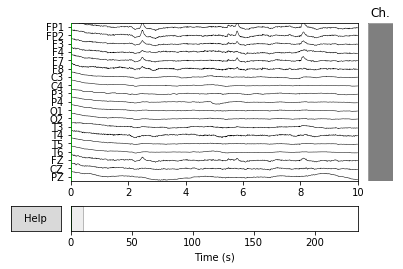

Figure(432x288)


In [22]:
print(raw.plot())

In [26]:
EEG.loc['110']['p300'][2][1]['FP1'].transpose()

0        0
1        0
2        1
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
58790    0
58791    0
58792    0
58793    0
58794    0
58795    0
58796    0
58797    0
58798    0
58799    0
58800    0
58801    0
58802    0
58803    0
58804    0
58805    0
58806    0
58807    0
58808    0
58809    0
58810    0
58811    0
58812    0
58813    0
58814    0
58815    0
58816    0
58817    0
58818    0
58819    0
Name: FP1, Length: 58820, dtype: int64

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 93 unique labels.


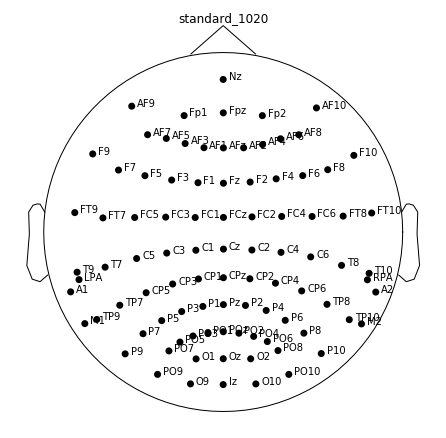

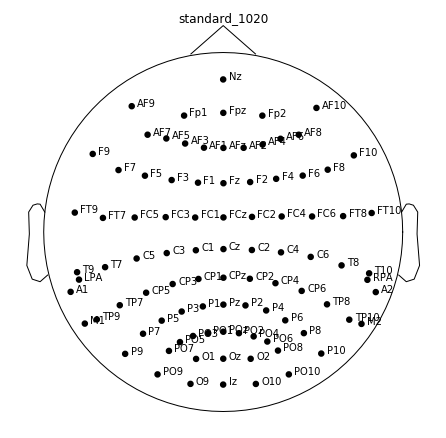

In [27]:
montage = mne.channels.read_montage("standard_1020")
montage.plot()

In [28]:
raw.set_montage(montage)

ValueError: No EEG channels found.